# Capstone Three Credit Card Customer Prediction Pre-processing and Modeling

## Introduction

A manager at the bank is increasingly concerned with the rising number of customers leaving their credit card services, resulting in a loss of business and revenue. In order to address this challenge, the bank wants to predict which customers are at high risk of churning, enabling proactive interventions to retain them. The goal is to develop a predictive model that can accurately identify customers likely to cancel their credit card services in the near future. By doing so, the bank can reach out to these customers with personalized offers, better services, or targeted communications to persuade them to stay and prevent further attrition.

## Libraries

In [1]:
import pandas as pd
import numpy as np

#Ploting
import matplotlib.pyplot as plt
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

#modeling
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

## Load Data

In [2]:
df_cleaned= pd.read_csv(r'C:\Users\dshaw\Springboard\Capstone Three Credit Card Customer Prediction/Data/df_cleaned.csv')
df_cleaned

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5,1,3,12691.0,777,11914.0,0.759941,1144.000000,42,0.712222,0.061
1,1,49.0,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,1,2,8256.0,864,7392.0,0.759941,1291.000000,33,0.712222,0.105
2,1,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,1,0,3418.0,0,3418.0,0.759941,1887.000000,20,0.712222,0.000
3,1,40.0,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,4,1,3313.0,2517,796.0,0.759941,1171.000000,20,0.712222,0.760
4,1,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,1,0,4716.0,0,4716.0,0.759941,816.000000,28,0.712222,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50.0,M,2,Graduate,Single,$40K - $60K,Blue,40.0,3,2,3,4003.0,1851,2152.0,0.703000,4404.086304,117,0.857000,0.462
10123,0,41.0,M,2,Unknown,Divorced,$40K - $60K,Blue,25.0,4,2,3,4277.0,2186,2091.0,0.804000,4404.086304,69,0.683000,0.511
10124,0,44.0,F,1,High School,Married,Less than $40K,Blue,36.0,5,3,4,5409.0,0,5409.0,0.819000,4404.086304,60,0.818000,0.000
10125,0,30.0,M,2,Graduate,Unknown,$40K - $60K,Blue,36.0,4,3,3,5281.0,0,5281.0,0.535000,8395.000000,62,0.722000,0.000


In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  float64
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  float64
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### Getting the statistical summary of dataset

In [4]:
df_cleaned.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325368,2.346203,35.945394,3.812580,2.341167,2.455317,6404.968849,1162.814061,5276.070660,0.738348,3575.407261,64.858003,0.694326,0.274894
std,0.367235,8.015036,1.298908,7.773496,1.554408,1.010622,1.106225,5022.383412,814.987335,5097.228225,0.161024,1619.533229,23.470452,0.173799,0.275691
min,0.000000,26.000000,0.000000,17.500000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.293000,510.000000,10.000000,0.231000,0.000000
25%,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.633000,2155.500000,45.000000,0.588000,0.023000
50%,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,8631.953698,1784.000000,7469.139637,0.840000,4458.500000,81.000000,0.800000,0.503000
max,1.000000,68.500000,5.000000,53.500000,6.000000,6.000000,6.000000,23760.000000,2517.000000,22616.000000,1.201000,8618.000000,135.000000,1.172000,0.999000


## Data Pre-processing

### Create dummy features for categorical variables-One-hot Encoding

Encoding the categorical features in X dataset by using One-Hot Encoding method
Splitting the data into Train and Test chunks for better evaluation

In [5]:
y = df_cleaned["Attrition_Flag"]
X = df_cleaned.drop("Attrition_Flag", axis=1)

In [6]:
# One-hot encode categorical columns
X = pd.get_dummies(X, columns=["Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Gender"])

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,45.0,3,39.0,5,1,3,12691.0,777,11914.0,0.759941,...,True,False,False,False,True,False,False,False,False,True
1,49.0,5,44.0,6,1,2,8256.0,864,7392.0,0.759941,...,False,False,True,False,True,False,False,False,True,False
2,51.0,3,36.0,4,1,0,3418.0,0,3418.0,0.759941,...,False,True,False,False,True,False,False,False,False,True
3,40.0,4,34.0,3,4,1,3313.0,2517,796.0,0.759941,...,False,False,True,False,True,False,False,False,True,False
4,40.0,3,21.0,5,1,0,4716.0,0,4716.0,0.759941,...,True,False,False,False,True,False,False,False,False,True


In [8]:
bool_columns = X.select_dtypes(include='bool').columns

In [9]:
X[bool_columns] = X[bool_columns].astype(int)

In [10]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,45.0,3,39.0,5,1,3,12691.0,777,11914.0,0.759941,...,1,0,0,0,1,0,0,0,0,1
1,49.0,5,44.0,6,1,2,8256.0,864,7392.0,0.759941,...,0,0,1,0,1,0,0,0,1,0
2,51.0,3,36.0,4,1,0,3418.0,0,3418.0,0.759941,...,0,1,0,0,1,0,0,0,0,1
3,40.0,4,34.0,3,4,1,3313.0,2517,796.0,0.759941,...,0,0,1,0,1,0,0,0,1,0
4,40.0,3,21.0,5,1,0,4716.0,0,4716.0,0.759941,...,1,0,0,0,1,0,0,0,0,1


In [11]:
X_train.shape

(7595, 37)

In [12]:
# Checking the shape of the splits to ensure it's correct
print("Training set features shape:", X_train.shape)
print("Test set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Test set target shape:", y_test.shape)

Training set features shape: (7595, 37)
Test set features shape: (2532, 37)
Training set target shape: (7595,)
Test set target shape: (2532,)


In [13]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit to the training data and then transform it
X_train = scaler.fit_transform(X_train)  

# Apply the transformation to the test data
X_test = scaler.transform(X_test)  

## Modeling

### Logistic Regression

                                        Accuracy  Precision    Recall  \
LogisticRegression(solver='liblinear')   0.89297   0.914491  0.961666   

                                        F1 Score   ROC AUC  \
LogisticRegression(solver='liblinear')  0.937486  0.906856   

                                        Cross-Validation Accuracy  
LogisticRegression(solver='liblinear')                   0.908756  


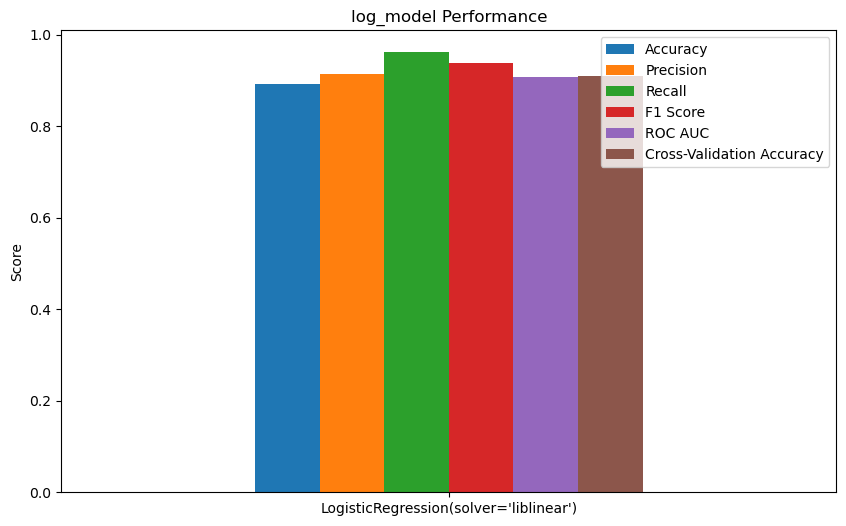

In [14]:
# Train the Logistic Regression model using the training data
log_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)

# Make predictions on the test set
y_pred = log_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])  # ROC AUC score



results = {}

# Store the results
results[log_model] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": auc
}

# Cross-validation score (using accuracy for evaluation)
cross_val_score_mean = np.mean(cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy'))  # 5-fold cross-validation
results[log_model]["Cross-Validation Accuracy"] = cross_val_score_mean

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Visualizing the performance of the model
results_df.plot(kind="bar", figsize=(10, 6), title="log_model Performance")
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

## Support Vector Machine (SVM)

In [ ]:
# Train the SVM model with a linear kernel
svm_model = SVC(kernel="linear", probability=True).fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])  # ROC AUC score



results = {}

# Store the results
results[svm_model] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": auc
}

# Cross-validation score (using accuracy for evaluation)
cross_val_score_mean = np.mean(cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy'))  # 5-fold cross-validation
results[svm_model]["Cross-Validation Accuracy"] = cross_val_score_mean

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Visualizing the performance of each model
results_df.plot(kind="bar", figsize=(10, 6), title="svm_model Performance")
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


### Naive Bayes Model

In [ ]:
# Create an instance of the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()  

# Fit the model to the training data
nb_classifier.fit(X_train, y_train)  

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])  # ROC AUC score



results = {}

# Store the results
results[nb_classifier] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": auc
}

# Cross-validation score (using accuracy for evaluation)
cross_val_score_mean = np.mean(cross_val_score(nb_classifier, X_train, y_train, cv=5, scoring='accuracy'))  # 5-fold cross-validation
results[nb_classifier]["Cross-Validation Accuracy"] = cross_val_score_mean

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Visualizing the performance of each model
results_df.plot(kind="bar", figsize=(10, 6), title="nb_classifier Performance")
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


## Conclusion

In conclusion, the Support Vector Machine (SVM) with a linear kernel is the top-performing model overall. It has the highest recall and F1 score, meaning it’s really good at correctly identifying positive cases while keeping a good balance between precision and recall. Although Logistic Regression has slightly better precision and ROC AUC, SVC out performes it when it comes to recall and F1 score. On the other hand, Gaussian Naive Bayes doesn't perform as well in accuracy, F1 score, or ROC AUC, making it the least effective of the three. So, SVC is the best choice here.